# Proyek Analisis Data : Sepeda




*   **Nama**: Nicholas Tanugroho
*   **Email**: nicho.tanugroho@gmail.com
*   **ID Dicoding**: nicholas_tanugroho_9qLf

# Menentukan Pertanyaan Bisnis

**Pertanyaan Bisnis**

1.   Apakah kondisi cuaca mempengaruhi kegiatan sewa menyewa dari data yang ada dan bagaimana komposisi penyewanya?
2.   Jam manakah yang menajdi prime time dalam kegiatan sewa menyewa?



# Import Semua Packages/Library yang Digunakan

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Data Wrangling

## Gathering Data

In [28]:
# Mengakses Data

data_day = r"Data\day.csv"
data_hour = r"Data\hour.csv"

day_df = pd.read_csv(data_day)
hour_df = pd.read_csv(data_hour)

## Assesing Data

In [29]:
# Meload data day
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:

# Menampilkan detail dataframe day
day_df.info()
print()
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
# Melihat data yang tidak baik pada dataframe day

print(f"Data yang hilang : \n{day_df.isnull().sum()}")
print(f"\nData yang duplikat : {day_df.duplicated().sum()}")

Data yang hilang : 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data yang duplikat : 0


In [32]:
# Meload data hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [33]:
# Menampilkan detail dataframe hour
hour_df.info()
print()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
# Melihat data yang tidak baik pada dataframe hour

print(f"Data yang hilang : \n{hour_df.isnull().sum()}")
print(f"\nData yang duplikat : {hour_df.duplicated().sum()}")

Data yang hilang : 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data yang duplikat : 0


## Cleaning Data

Data sudah bersih, jadi tidak memerlukan proses pembersihan data

# Exploratory Data Analysis

## Pertanyaan 1

In [35]:
hour_df.groupby(by="hr").agg({
    'casual': ['mean','sum'],
    'registered':['mean','sum'],
    'cnt' : ['mean','sum']
})

casual         registered                 cnt        
         mean    sum        mean     sum        mean     sum
hr                                                          
0   10.158402   7375   43.739669   31755   53.898072   39130
1    6.504144   4709   26.871547   19455   33.375691   24164
2    4.772028   3412   18.097902   12940   22.869930   16352
3    2.715925   1893    9.011478    6281   11.727403    8174
4    1.253945    874    5.098996    3554    6.352941    4428
5    1.411437   1012   18.478382   13249   19.889819   14261
6    4.161379   3017   71.882759   52115   76.044138   55132
7   11.055021   8037  201.009629  146134  212.064649  154171
8   21.679505  15761  337.331499  245240  359.011004  261001
9   30.891334  22458  188.418157  136980  219.309491  159438
10  46.477304  33789  127.191197   92468  173.668501  126257
11  59.540578  43286  148.602476  108034  208.143054  151320
12  68.293956  49718  185.021978  134696  253.315934  184414
13  72.308642  52713  181.352538  132206  253.661180  184919
14  75.567901  55089  165.381344  120563  240.949246  175652
15  74.905350  54606  176.327846  128543  251.233196  183149
16  73.745205  53834  238.238356  173914  311.983562  227748
17  74.273973  54220  387.178082  282640  461.452055  336860
18  61.120879  44496  364.390110  265276  425.510989  309772
19  48.770604  35505  262.752747  191284  311.523352  226789
20  36.233516  26378  189.796703  138172  226.030220  164550
21  28.255495  20570  144.059066  104875  172.314560  125445
22  22.252747  16200  109.082418   79412  131.335165   95612
23  15.199176  11065   72.631868   52876   87.831044   63941

## Pertanyaan 2

In [36]:
dayData = day_df.groupby(by="weathersit").agg({
    'casual': ['mean','sum'],
    'registered':['mean','sum'],
    'cnt' : ['mean','sum']
})

dayData.index = dayData.index.map({
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan/Salju Ringan',
    4: 'Hujan/Salju Berat'
})

dayData

casual           registered                   cnt  \
                          mean     sum         mean      sum         mean   
weathersit                                                                  
Cerah               964.030238  446346  3912.755940  1811606  4876.786177   
Berkabut            687.352227  169776  3348.510121   827082  4035.862348   
Hujan/Salju Ringan  185.476190    3895  1617.809524    33974  1803.285714   

                             
                        sum  
weathersit                   
Cerah               2257952  
Berkabut             996858  
Hujan/Salju Ringan    37869

# Data Visualisation

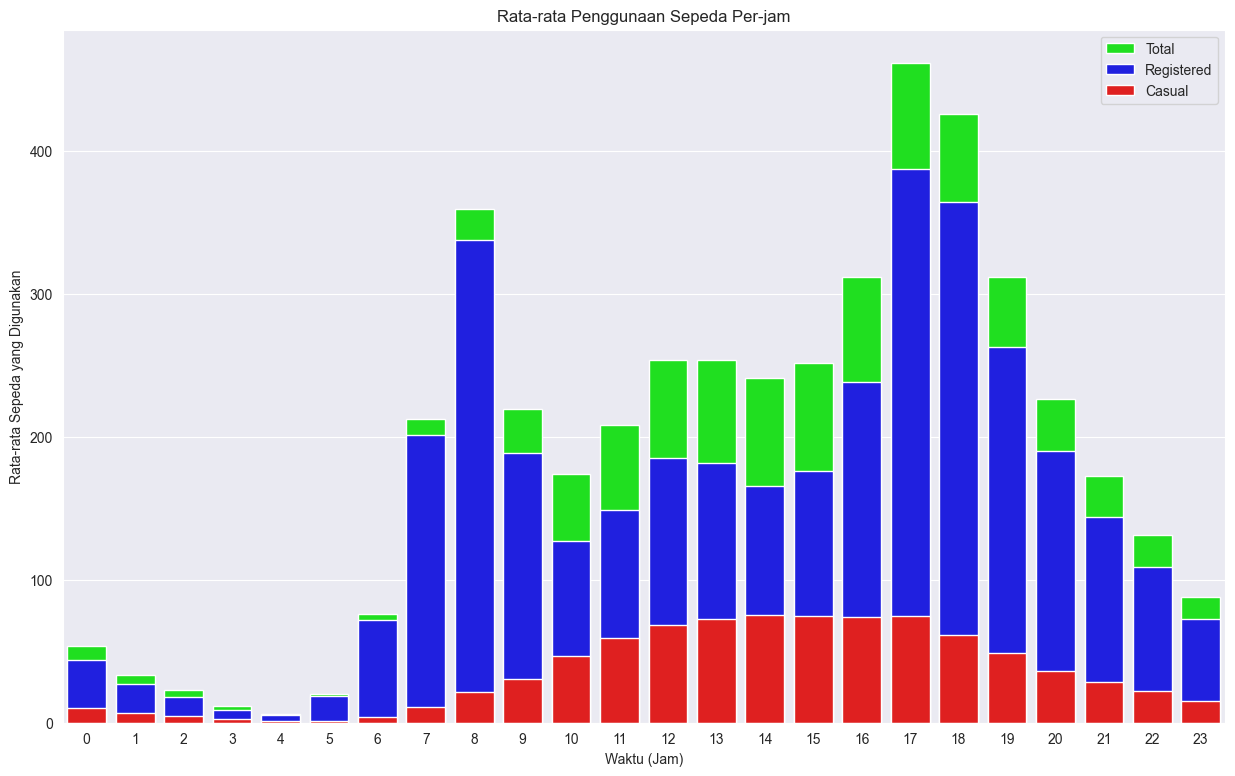

In [37]:
penggunaan_per_jam = hour_df.groupby('hr')[['casual','registered','cnt']].mean()

plt.figure(figsize=(15,9))

sns.barplot(x=penggunaan_per_jam.index, y=penggunaan_per_jam['cnt'], color='lime',label='Total')
sns.barplot(x=penggunaan_per_jam.index, y=penggunaan_per_jam['registered'], color='blue',label='Registered')
sns.barplot(x=penggunaan_per_jam.index, y=penggunaan_per_jam['casual'], color='red',label='Casual')

plt.title('Rata-rata Penggunaan Sepeda Per-jam')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Rata-rata Sepeda yang Digunakan')
plt.show()

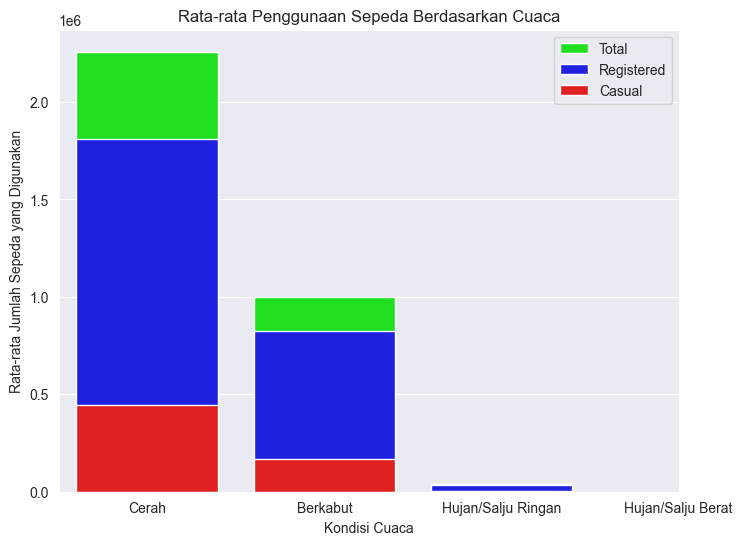

In [38]:
cuaca = day_df.groupby('weathersit')[['casual','registered','cnt']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=cuaca.index, y=cuaca['cnt'], color='lime',label='Total')
sns.barplot(x=cuaca.index, y=cuaca['registered'], color='blue',label='Registered')
sns.barplot(x=cuaca.index, y=cuaca['casual'], color='red',label='Casual')

plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sepeda yang Digunakan')
plt.xticks([0, 1, 2, 3], ['Cerah', 'Berkabut', 'Hujan/Salju Ringan', 'Hujan/Salju Berat'])
plt.show()

# Conslusion


 Rata rata penggunaan sepeda paling banyak pada pukul 17:00 dan diikuti oleh pukul 18:00 lalu mengalami penurunan penyewa pada pukul 19:00. Sedangkan penyewa paling sedikit pada pukul 04:00. Dapat terlihat juga bahwa komposisi penyewa yang menyewa mayoritas dari kelompok 'registered'.

 Juga dapat terdapat data bahwa kondisi cuaca cerah mendapat jumlah penyewa paling banyak lalu juga ditemukan bahwa tidak terdapat kegiatan sewa menyewa pada saat kondisi cuaca hujan/salju berat.

